In [16]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [17]:
#read csv file
df=pd.read_csv('covid_de.csv')
df.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,M,2020-04-05,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,M,2020-05-18,1,0,1


In [18]:
#cheak missing data
#missing values in two columns(age_group,gender)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89090 entries, 0 to 89089
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   state      89090 non-null  object
 1   county     89090 non-null  object
 2   age_group  88980 non-null  object
 3   gender     88830 non-null  object
 4   date       89090 non-null  object
 5   cases      89090 non-null  int64 
 6   deaths     89090 non-null  int64 
 7   recovered  89090 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 5.4+ MB


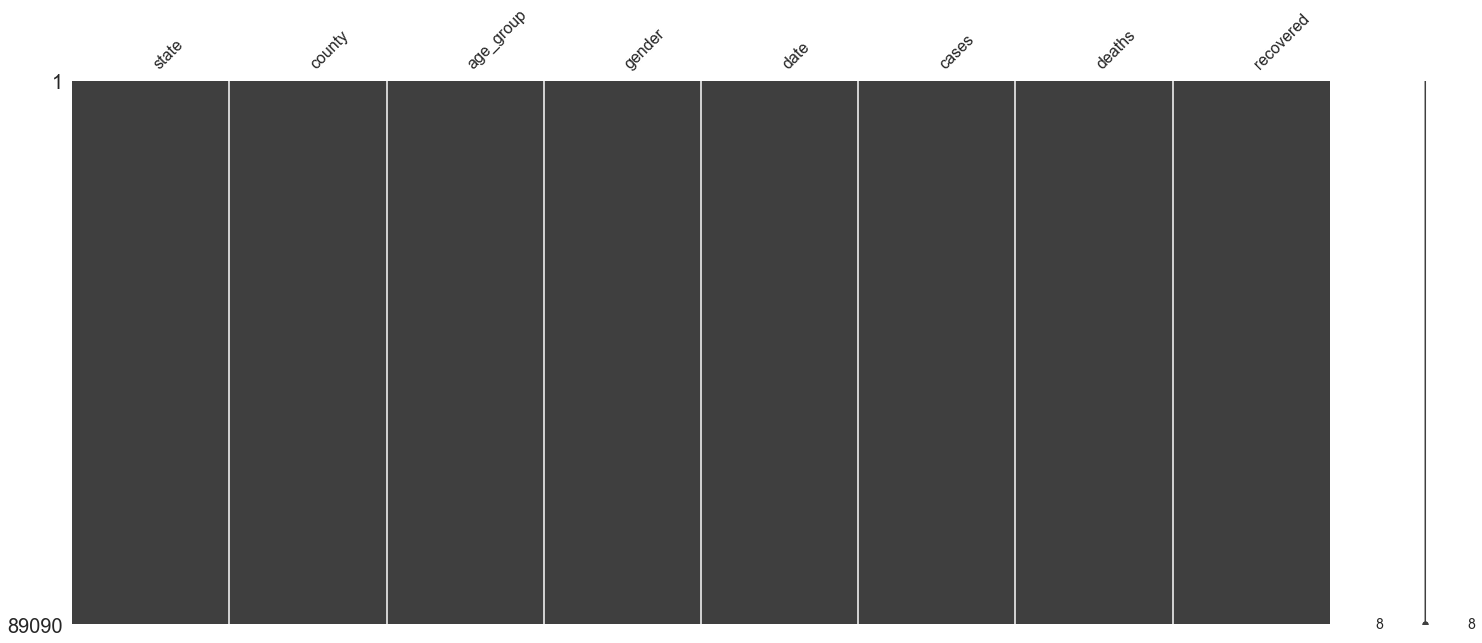

In [19]:
#cleaning data(fill all the nan value with previous value)
df=df.fillna(method='ffill')
msno.matrix(df)

In [20]:
#data cleaning 
df.cases = df.groupby('gender')['cases'].cumsum()
df.deaths = df.groupby('gender')['deaths'].cumsum()
df.recovered= df.groupby('gender')['recovered'].cumsum()


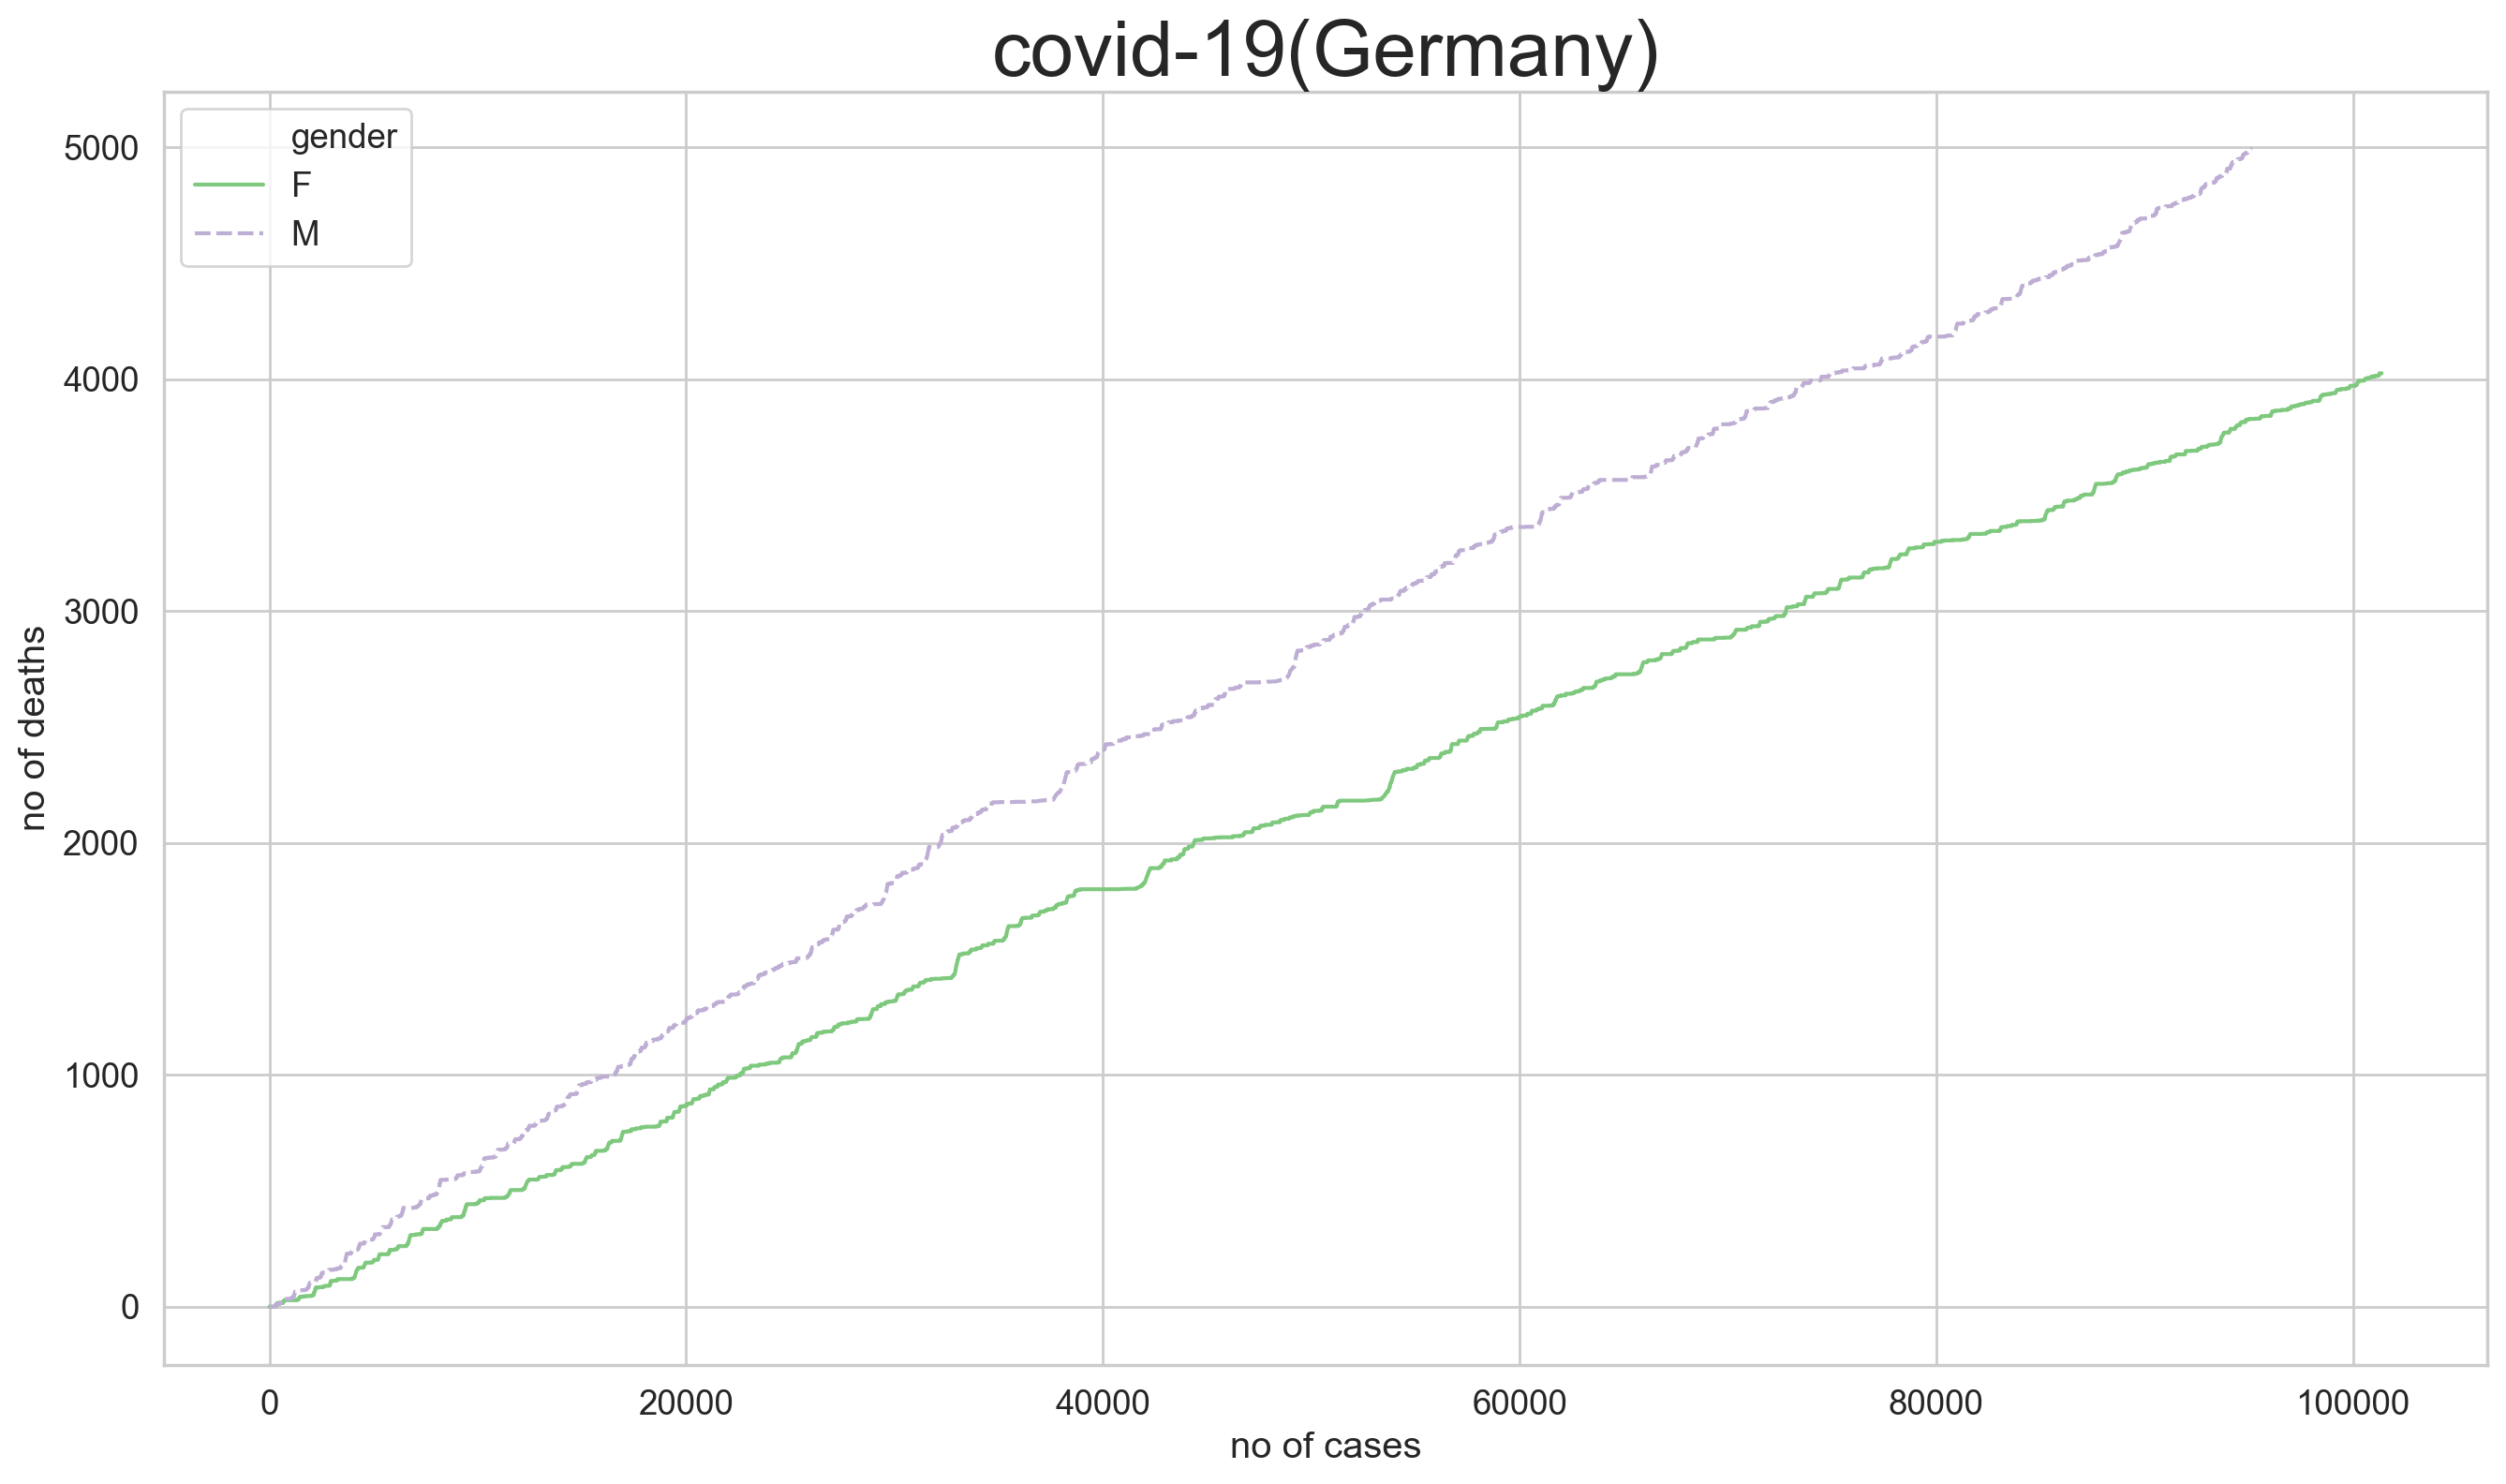

In [21]:
#implementation of seaborn library
#seaborn lineplot

plt.figure(figsize=(16,9),dpi=200)

sns.set(style='whitegrid', font_scale=1.2, palette='Accent')

sns.lineplot(x="cases", y="deaths",data=df,hue='gender',style='gender',legend='full')

plt.title('covid-19(Germany)', fontsize=30)
plt.xlabel('no of cases')
plt.ylabel('no of deaths')


plt.show()



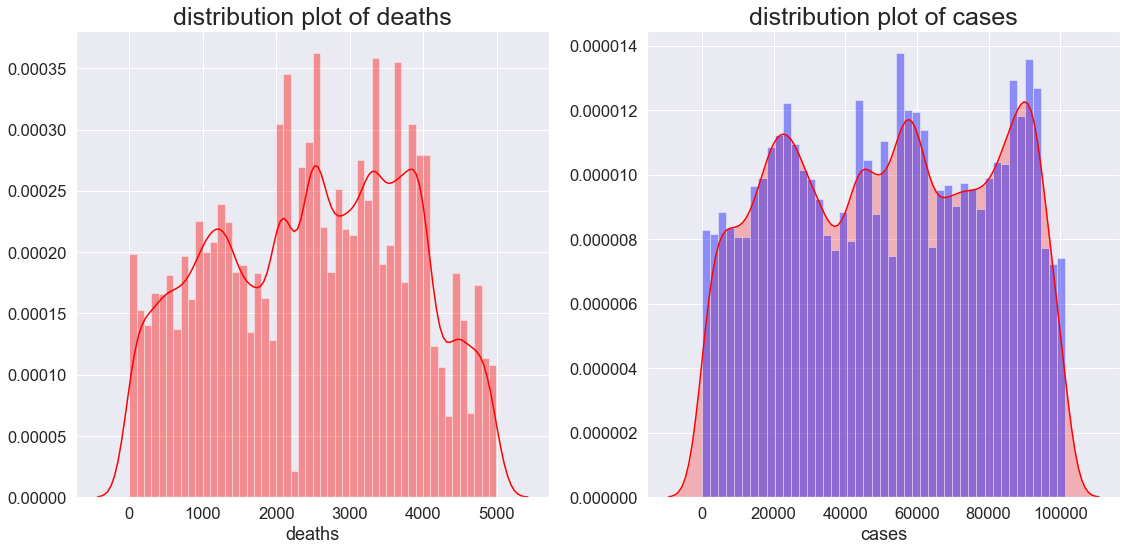

In [22]:
#seaborn histrogram plot

plt.figure(figsize=(16,8))

sns.set(style="darkgrid", palette="YlOrRd",font_scale=1.5)

plt.subplot(1,2,1)
sns.distplot(df['deaths'],color='red', vertical=False)
plt.title('distribution plot of deaths',fontsize=25)

plt.subplot(1,2,2)
sns.distplot(df['cases'],color='red',hist_kws={'color':'blue'}, kde_kws={"shade": True})

plt.title('distribution plot of cases',fontsize=25)
plt.tight_layout()
plt.show()



In [23]:
#again import the csv file for barplot
df1=pd.read_csv('covid_de.csv')

In [24]:
#data setting
df1.cases = df1.groupby('state')['cases'].cumsum()
df1.deaths = df1.groupby('state')['deaths'].cumsum()
df1.recovered= df1.groupby('state')['recovered'].cumsum()
df1


,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,2,0,2
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,3,0,3
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,M,2020-04-05,4,0,4
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,M,2020-05-18,5,0,5
...,...,...,...,...,...,...,...,...
89085,Thueringen,SK Weimar,60-79,M,2020-04-09,3267,181,3039
89086,Thueringen,SK Weimar,80-99,F,2020-03-28,3269,181,3041
89087,Thueringen,SK Weimar,80-99,F,2020-04-21,3270,181,3042
89088,Thueringen,SK Weimar,80-99,M,2020-03-24,3271,181,3043


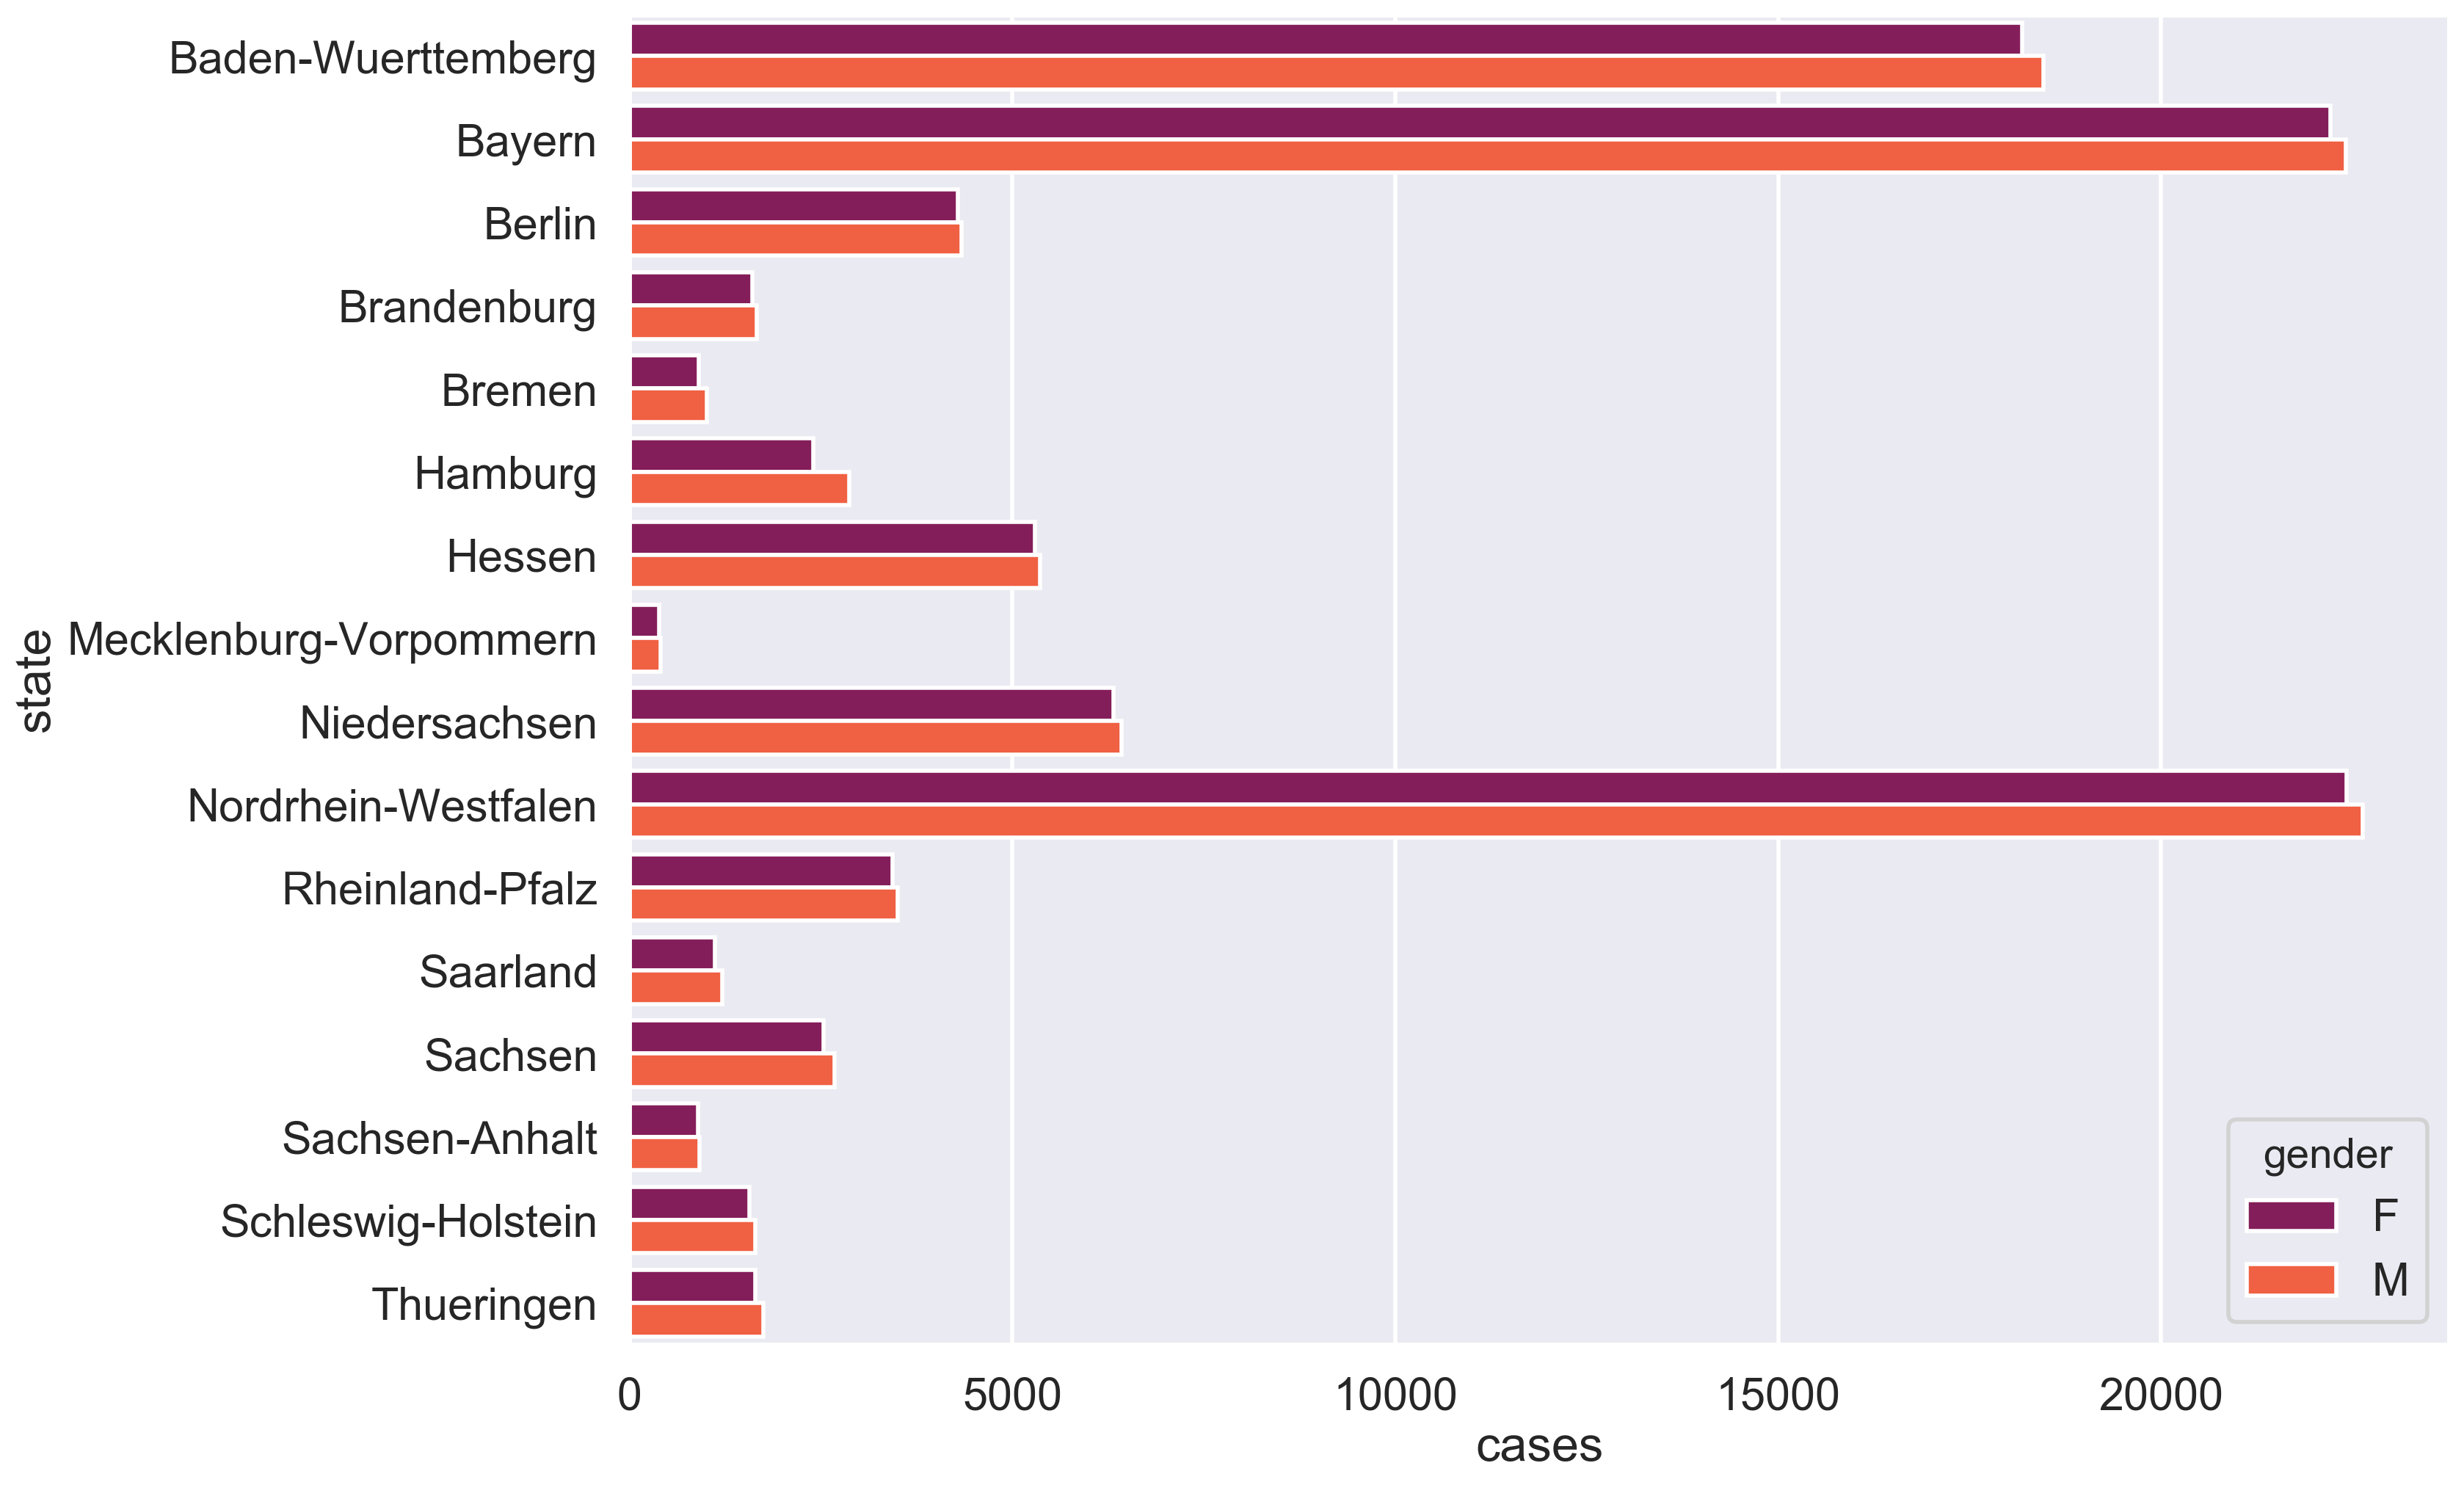

In [25]:
#seaborn barplot

plt.figure(figsize=(16,12),dpi=200)

sns.set(style="darkgrid", context="poster")

sns.barplot(x='cases', y='state', palette="rocket",data=df1,hue='gender',ci=None, orient='h',saturation=10)

plt.show()
